In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data = pd.read_csv('fertilizerprediction.csv')
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Black,Wheat,30,0,20,Urea
1,29,52,45,Clayey,Cotton,15,0,40,DAP
2,34,65,62,Black,Sugarcane,20,10,30,20-20
3,32,62,34,Red,Wheat,25,0,20,Urea
4,28,54,46,Clayey,Cotton,35,0,0,Urea


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      132 non-null    int64 
 1   Humidity         132 non-null    int64 
 2   Moisture         132 non-null    int64 
 3   Soil Type        132 non-null    object
 4   Crop Type        132 non-null    object
 5   Nitrogen         132 non-null    int64 
 6   Potassium        132 non-null    int64 
 7   Phosphorous      132 non-null    int64 
 8   Fertilizer Name  132 non-null    object
dtypes: int64(6), object(3)
memory usage: 9.4+ KB


In [4]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [5]:
#checking unique values
data.nunique()

Temparature    16
Humidity       16
Moisture       40
Soil_Type       5
Crop_Type       3
Nitrogen       12
Potassium       7
Phosphorous    12
Fertilizer      4
dtype: int64

In [6]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [7]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,132.000000,132.000000,132.000000,132,132,132.000000,132.000000,132.000000,132
unique,NaN,NaN,NaN,5,3,NaN,NaN,NaN,4
top,NaN,NaN,NaN,Red,Wheat,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,41,56,NaN,NaN,NaN,77
mean,30.325758,59.053030,43.348485,NaN,NaN,20.234848,2.742424,23.598485,NaN
std,3.530664,5.870504,11.342674,NaN,NaN,6.402361,4.322180,6.453427,NaN
min,23.000000,48.000000,25.000000,NaN,NaN,8.000000,0.000000,0.000000,NaN
25%,28.000000,54.000000,34.000000,NaN,NaN,15.000000,0.000000,20.000000,NaN
50%,30.000000,60.000000,41.500000,NaN,NaN,20.000000,0.000000,20.000000,NaN
75%,33.000000,64.000000,51.000000,NaN,NaN,25.000000,5.000000,30.000000,NaN


In [8]:
#Defining function for Continuous and catogorical variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = data.Fertilizer)
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = data.Fertilizer, ax=axes[1])

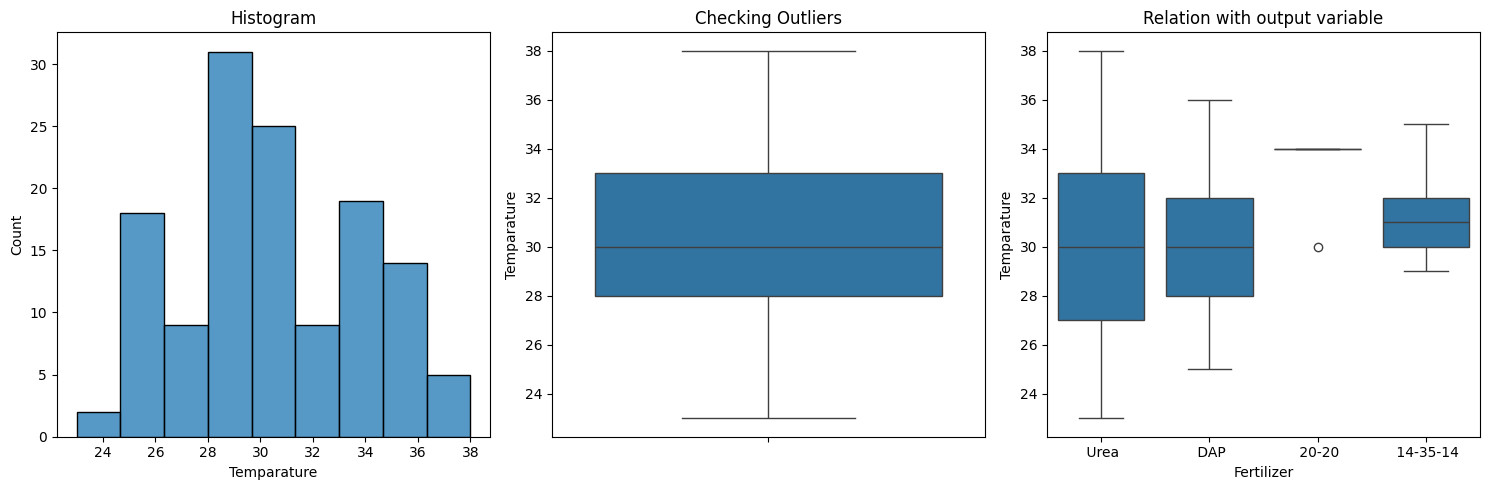

In [9]:
#EDA - Temparature variable
plot_conti(data.Temparature)

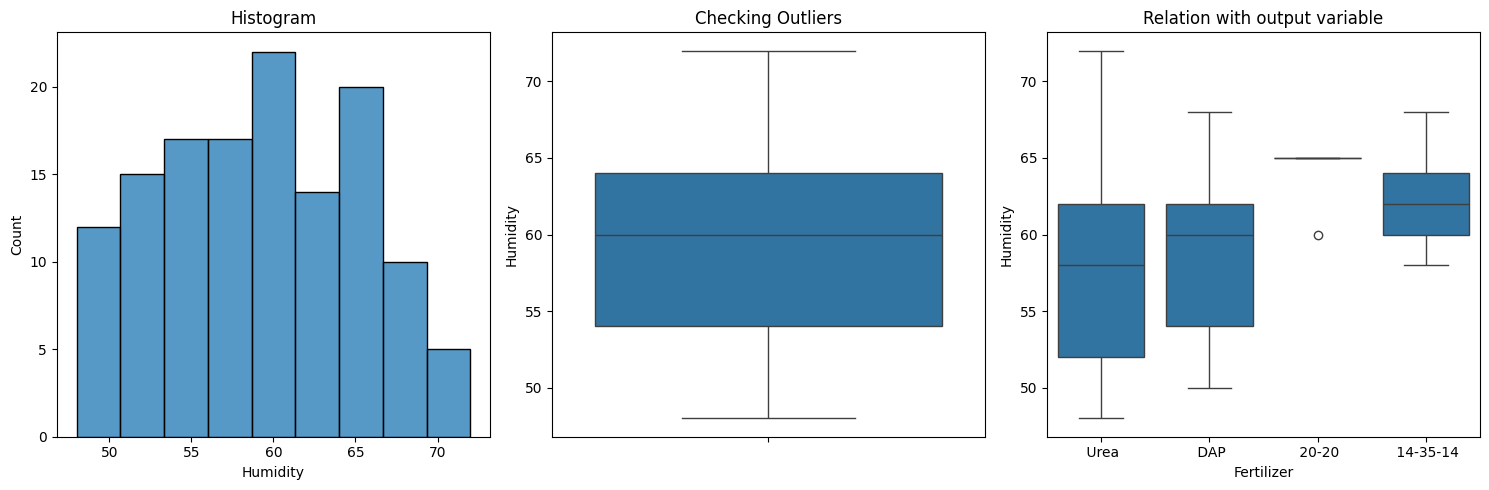

In [10]:
#EDA - Humidity variable
plot_conti(data.Humidity)

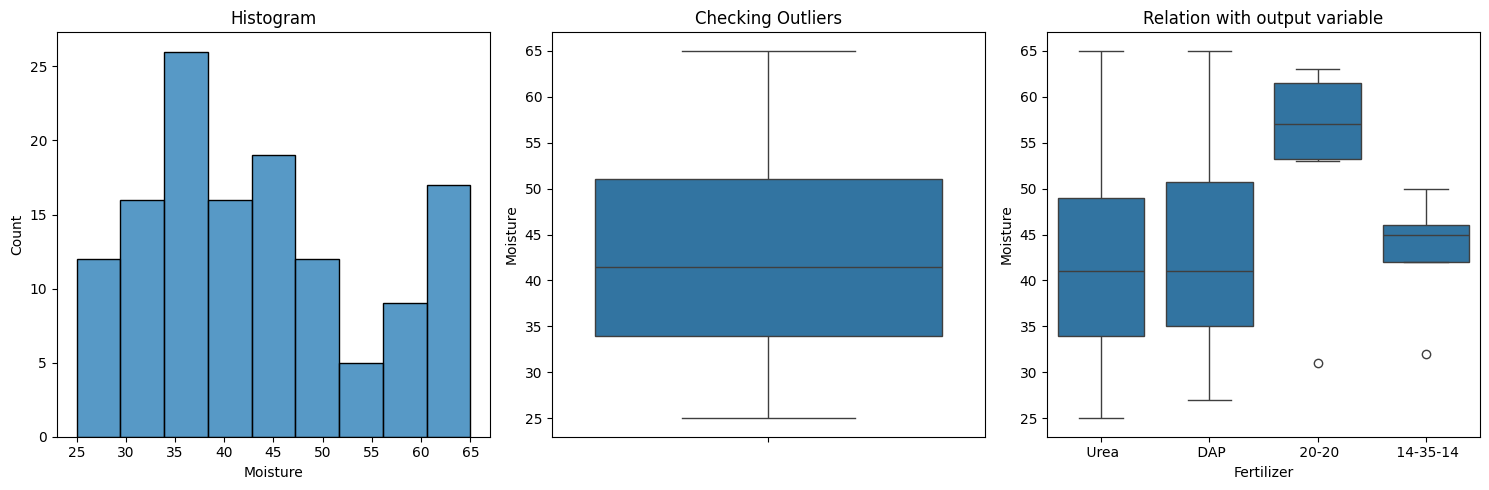

In [11]:
#EDA - Moisture variable
plot_conti(data.Moisture)

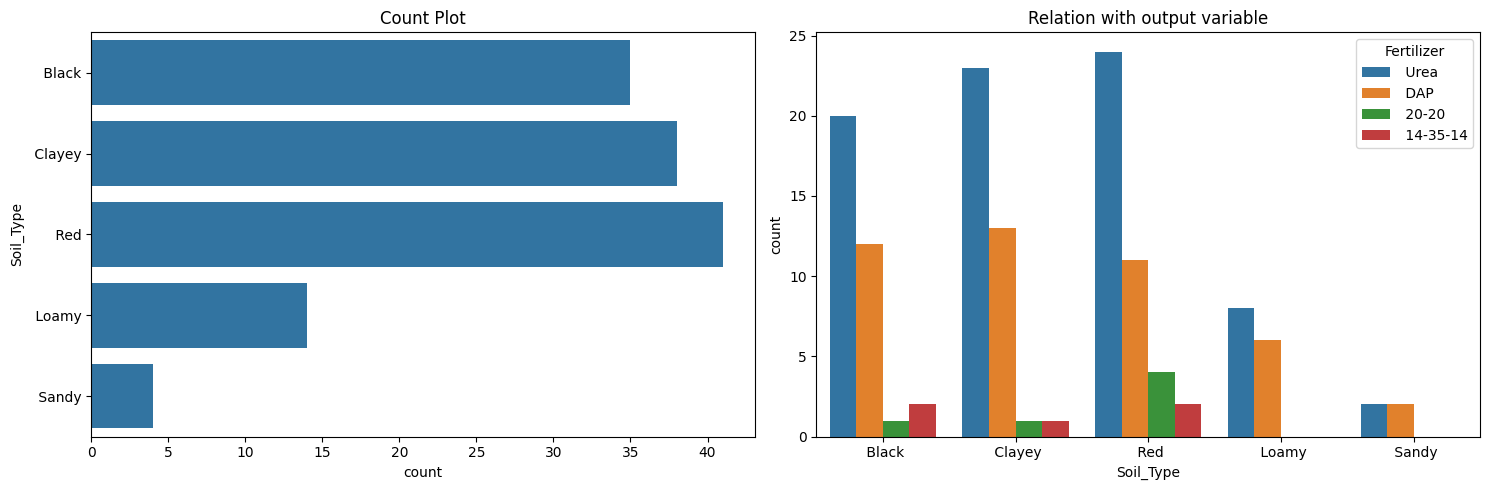

In [12]:
#EDA - Soil_Type variable
plot_cato(data.Soil_Type)

<Axes: xlabel='Soil_Type', ylabel='Temparature'>

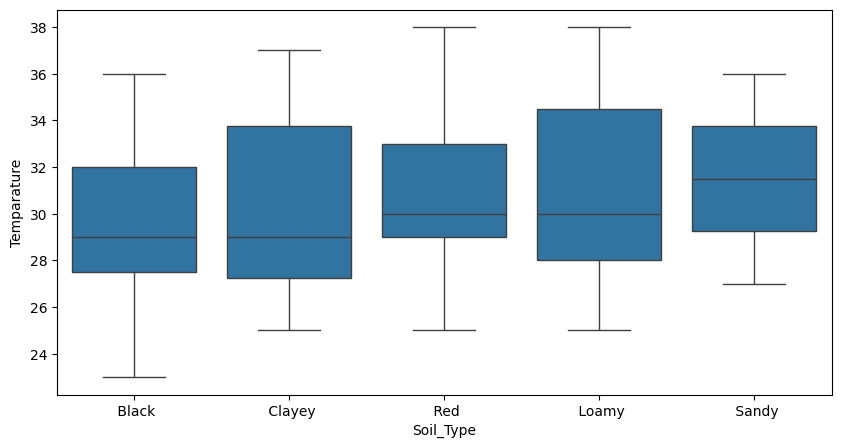

In [13]:
#relation of soil type with Temperature 
plt.figure(figsize=(10,5))
sns.boxplot(x=data.Soil_Type,y=data.Temparature)

<Axes: xlabel='Soil_Type', ylabel='Temparature'>

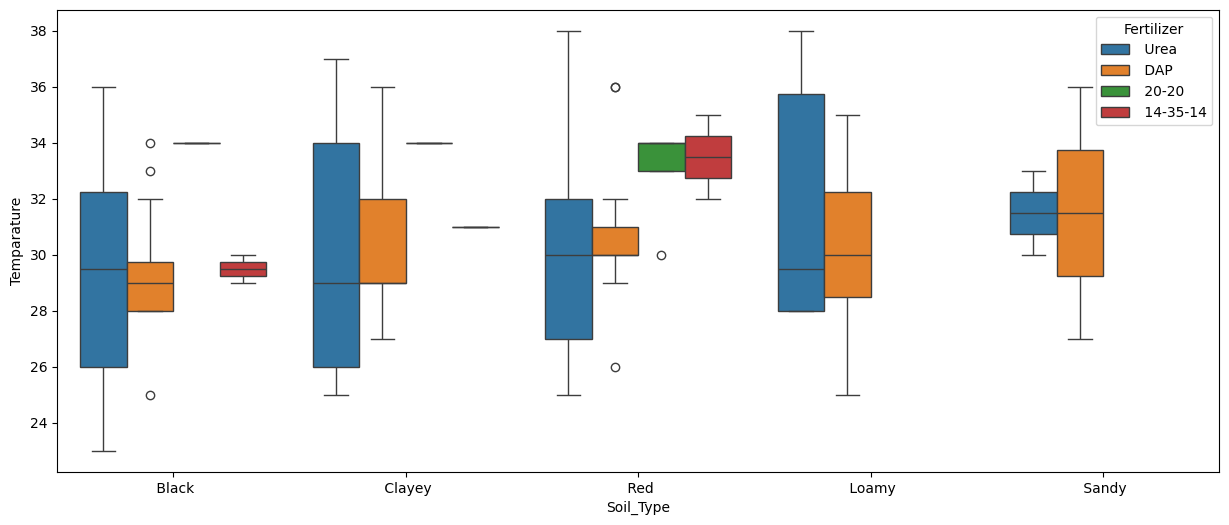

In [14]:
#relation of soil type and Temperature with output variable
plt.figure(figsize=(15,6))
sns.boxplot(x=data.Soil_Type,y=data.Temparature,hue=data.Fertilizer)

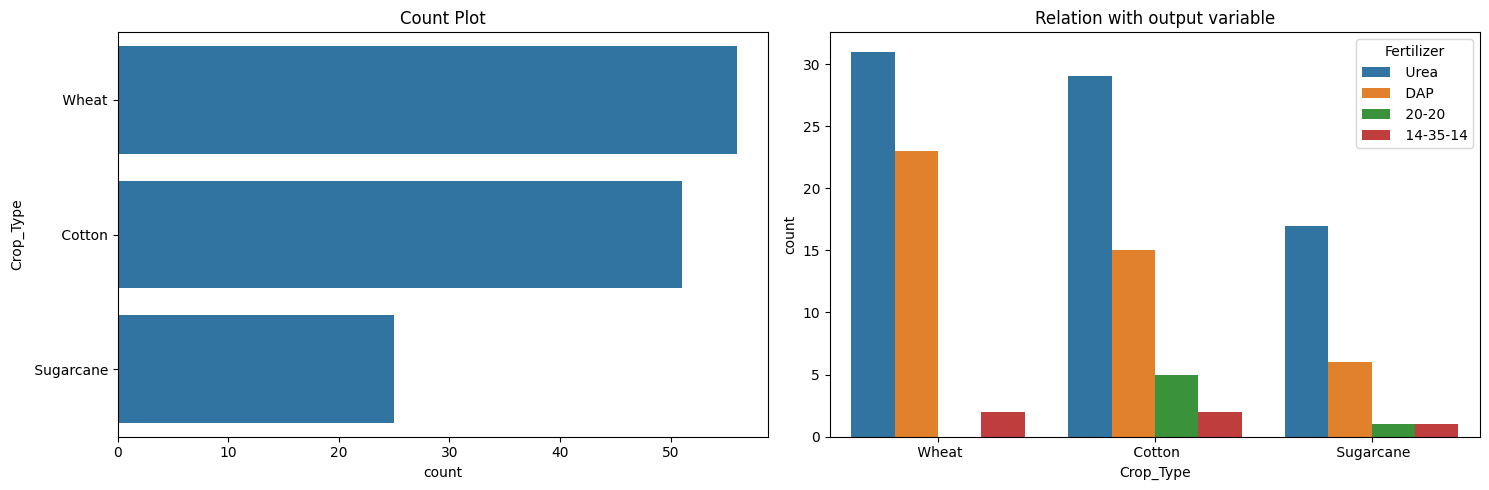

In [15]:
#EDA - Crop_Type variable
plot_cato(data.Crop_Type)

<Axes: xlabel='Crop_Type', ylabel='Temparature'>

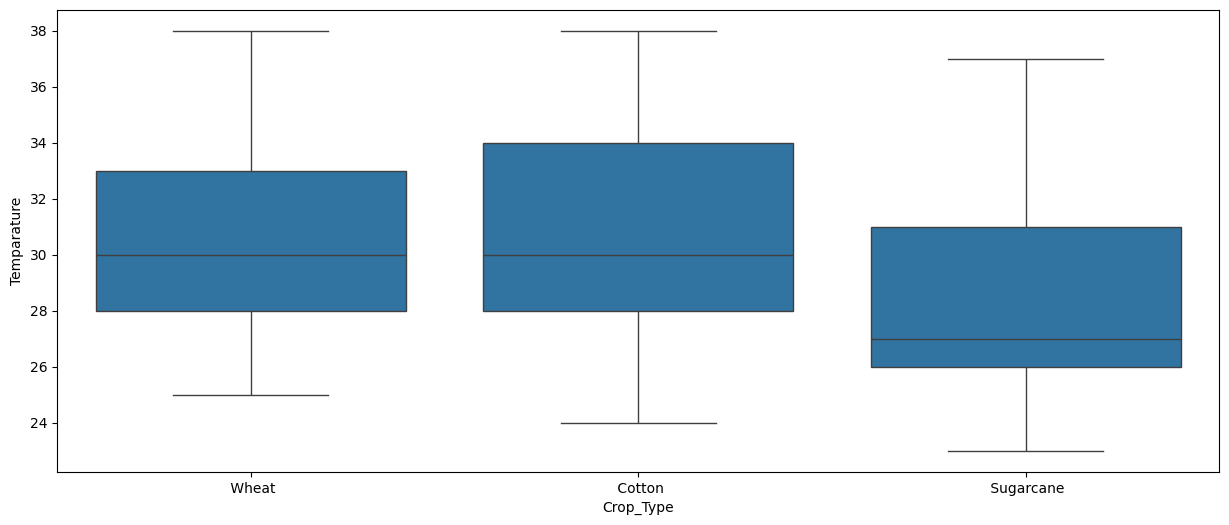

In [16]:
#relation of crop type with temperature
plt.figure(figsize=(15,6))
sns.boxplot(x=data.Crop_Type,y=data.Temparature)

<Axes: xlabel='Crop_Type', ylabel='Humidity'>

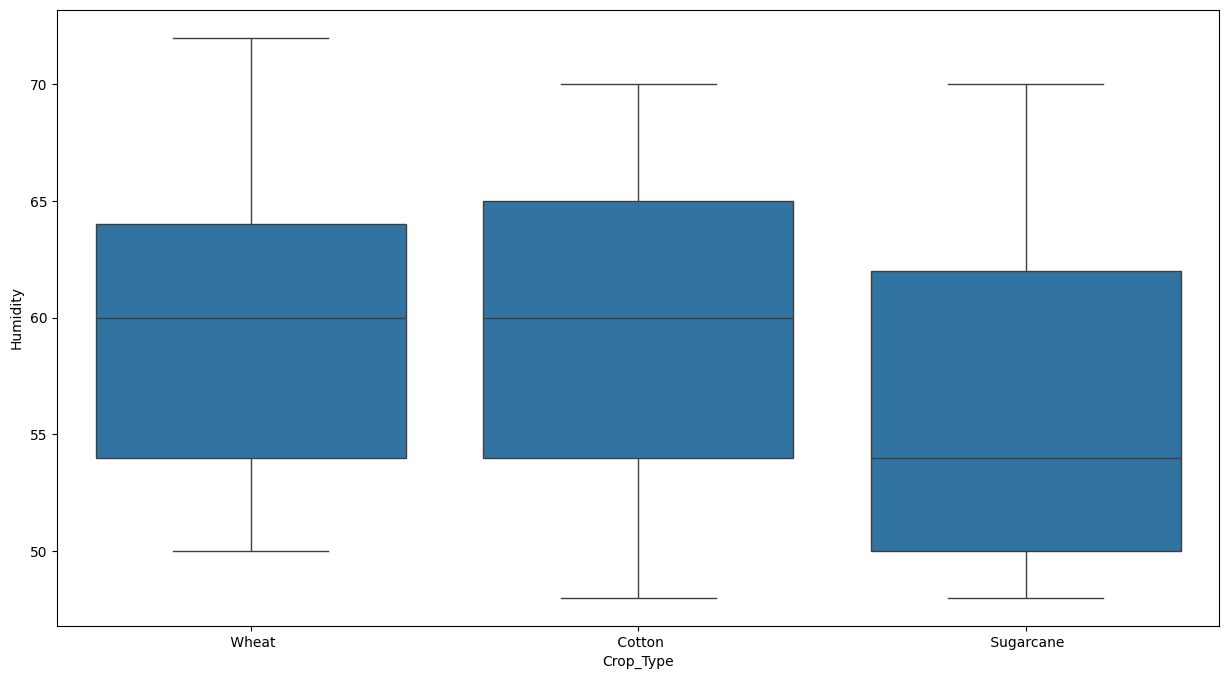

In [17]:
#relation of crop type with Humidity
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Crop_Type,y=data.Humidity)

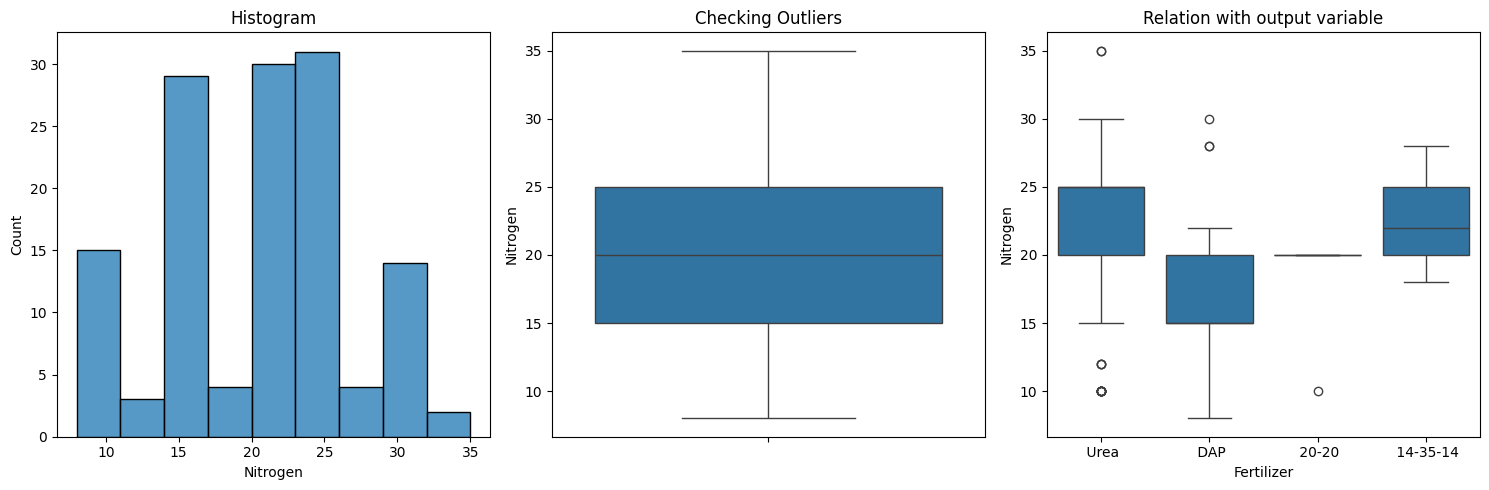

In [18]:
#EDA - Nitrogen variable
plot_conti(data.Nitrogen)

<Axes: xlabel='Crop_Type', ylabel='Nitrogen'>

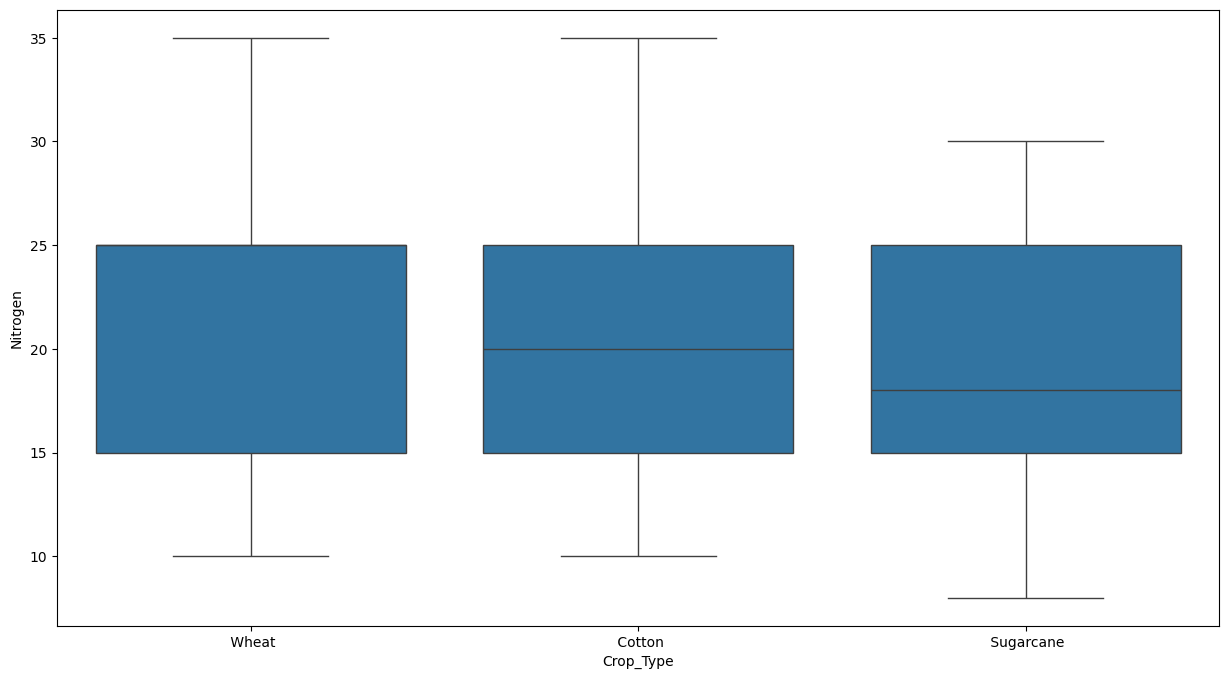

In [19]:
#relation of nitrogen wrt to crop type
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Crop_Type,y=data.Nitrogen)

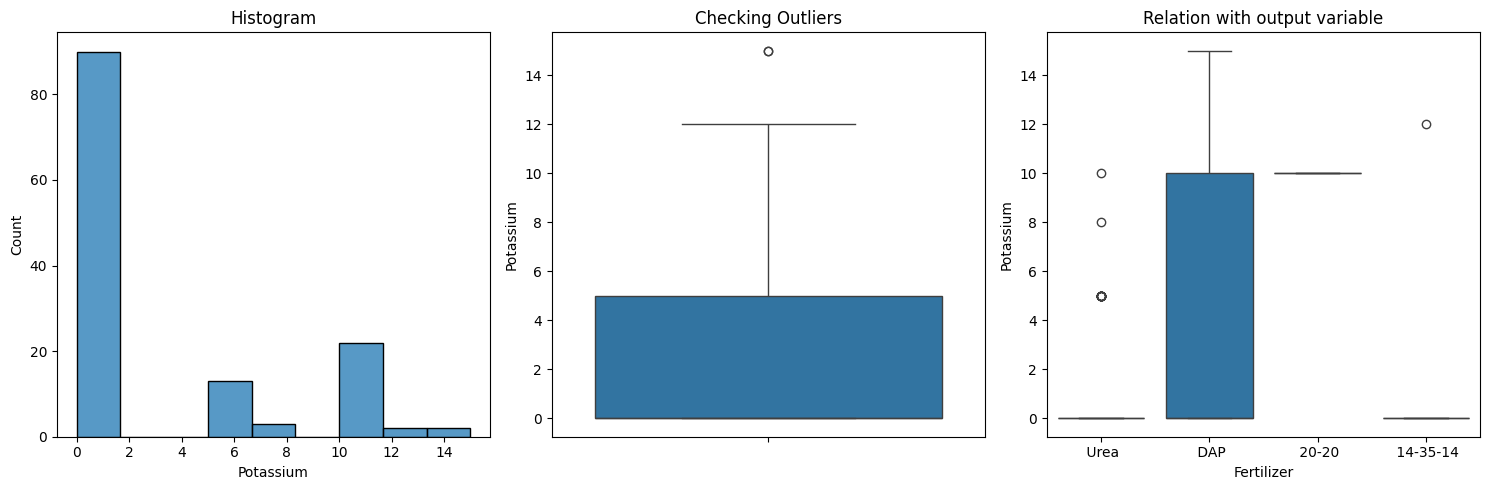

In [20]:
#EDA - Potassium variable
plot_conti(data.Potassium)

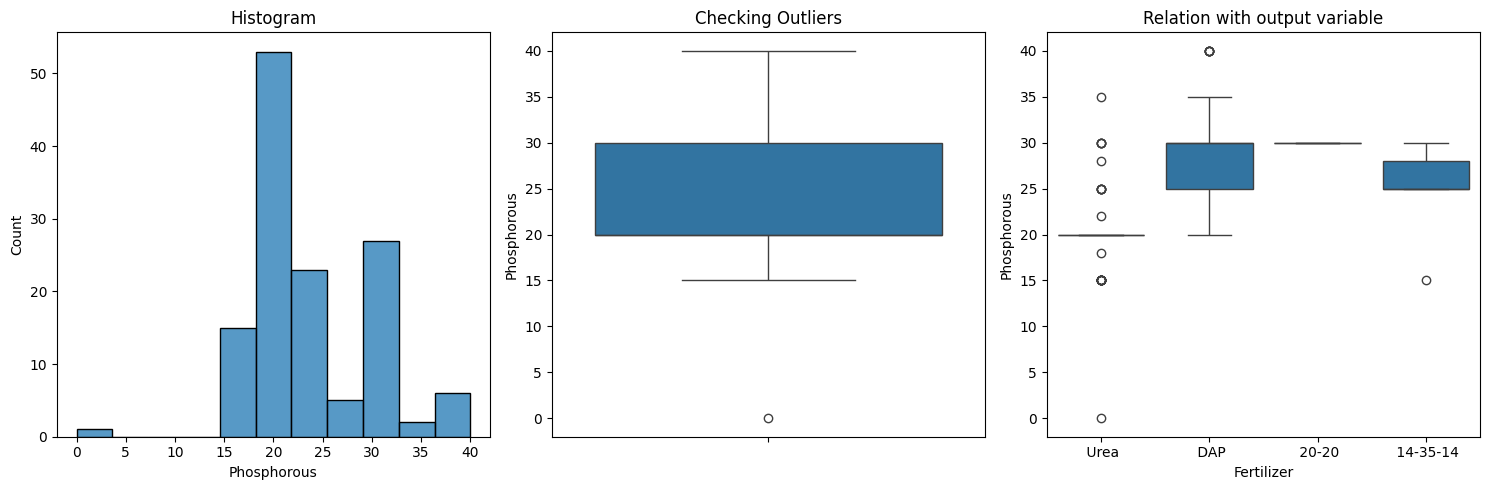

In [21]:
#EDA - Phosphorous variable
plot_conti(data.Phosphorous)

In [22]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder

In [23]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [24]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Cotton,0
Sugarcane,1
Wheat,2


In [25]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
14-35-14,0
20-20,1
DAP,2
Urea,3


In [26]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (105, 8), y_train = (105,), x_test = (27, 8), y_test = (27,)


In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 31 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  105 non-null    int64
 1   Humidity     105 non-null    int64
 2   Moisture     105 non-null    int64
 3   Soil_Type    105 non-null    int32
 4   Crop_Type    105 non-null    int32
 5   Nitrogen     105 non-null    int64
 6   Potassium    105 non-null    int64
 7   Phosphorous  105 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 6.6 KB


### RandomForest Classifier

In [28]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()

In [30]:
pred_rand = rand.fit(x_train,y_train).predict(x_test)

print(classification_report(y_test,pred_rand))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}

grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

Best score :  0.7714285714285715
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [33]:
#Final Model
params = {
    'n_estimators':[350,400,450],
    'max_depth':[2,3,4,5,6,7],
    'min_samples_split':[2,5,8]
}

grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(data.drop('Fertilizer',axis=1),data.Fertilizer)

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best score :  0.8030303030303031
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}


In [34]:
x_train

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous
31,30,60,29,0,0,20,0,30
59,32,62,34,3,2,25,0,20
39,29,58,34,3,1,25,0,20
113,29,58,37,1,2,28,0,20
118,34,65,64,0,0,25,0,20
...,...,...,...,...,...,...,...,...
109,27,54,31,1,2,28,0,20
71,25,50,32,1,2,25,0,20
79,35,65,60,2,0,10,15,30
72,30,60,27,3,0,20,10,25


In [35]:
#pickling the file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [36]:
y_train

31     3
59     3
39     3
113    2
118    3
      ..
109    2
71     3
79     2
72     2
37     3
Name: Fertilizer, Length: 105, dtype: int32

In [37]:
#pickling the file
import pickle
pickle_out = open('fertilizer.pkl','wb')
pickle.dump(encode_ferti,pickle_out)
pickle_out.close()

In [38]:
ferti = pickle.load(open('fertilizer.pkl','rb'))
ferti.classes_[2]

' DAP'

In [39]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\Users\Harshit Bajaj\OneDrive\Desktop\RBL\website\env\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.metrics import classification_report

# Assuming y_true and y_pred are your true and predicted labels
y_true = [1, 0, 1, 2, 0, 0, 1, 2]
y_pred = [1, 0, 1, 2, 0, 1, 1, 2]

# Example usage of classification_report
report = classification_report(y_true, y_pred)

# Print the classification report
print(report)




              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         2

    accuracy                           0.88         8
   macro avg       0.92      0.89      0.89         8
weighted avg       0.91      0.88      0.87         8

